<a href="https://colab.research.google.com/github/levidavis123/MGSC310/blob/main/MGSC_410%2C_Project_1_Extension%2C_Finn_Cameron_Levi_Davis%2C_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/lotwize_case.csv')

df.head()

,schools/0/distance,schools/1/grades,schools/2/level,schools/0/name,schools/1/rating,schools/2/size,schools/0/totalCount,schools/1/type,county,isRentalListingOffMarket,...,nearbyHomes/1/propertyTypeDimension,nearbyHomes/1/state,nearbyHomes/2/bathrooms,nearbyHomes/2/bedrooms,nearbyHomes/2/livingArea,nearbyHomes/2/livingAreaUnits,nearbyHomes/2/livingAreaUnitsShort,nearbyHomes/2/livingAreaValue,nearbyHomes/2/zpid,resoFacts/flooring/0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,1.0,2.0,1100.0,Square Feet,sqft,1100.0,2.077507e+09,Tile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,4.0,1990.0,Square Feet,sqft,1990.0,1.560648e+07,Hardwood
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,1.252437e+08,Linoleum
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet


In [ ]:
## put the code for the features you engineered here, and then write the feature names into the new dataset below ##


In [ ]:
import pandas as pd

# Assuming df is your original dataset

# List of variables you will use for the project
# Corrected list of variables for your project
selected_columns = [
    # Location-Based Features
    'county', 'address/zipcode', 'nearbyHomes/3/latitude', 'nearbyHomes/3/longitude', 'address/city', 'state',

    # Property Characteristics
    'bedrooms', 'bathrooms', 'livingArea', 'lotAreaValue', 'yearBuilt',
    'propertyTypeDimension', 'homeType', 'resoFacts/storiesTotal',
    'resoFacts/livingArea', 'resoFacts/lotSize',

    # Market Information
    'priceHistory/0/price', 'mortgageRates/thirtyYearFixedRate', 'propertyTaxRate',

    # Property Condition and Features
    'resoFacts/propertyCondition', 'resoFacts/constructionMaterials/0',
    'resoFacts/foundationDetails/0', 'resoFacts/fireplaces',
    'resoFacts/interiorFeatures/0', 'resoFacts/patioAndPorchFeatures/0',
    'resoFacts/roofType', 'resoFacts/fencing', 'resoFacts/poolFeatures/0',

    # Community and Surroundings
    'schools/0/distance', 'schools/1/rating', 'schools/2/level',
    'resoFacts/communityFeatures/0',

    # Financial Information
    'monthlyHoaFee', 'lastSoldPrice', 'resoFacts/pricePerSquareFoot', 'price'
]


# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]

# Optional: Save this new DataFrame to a CSV file for future use
df_selected.to_csv('filtered_dataset.csv', index=False)

# Check the first few rows of the new DataFrame
print(df_selected.head())


  county  address/zipcode  nearbyHomes/3/latitude  nearbyHomes/3/longitude  \
0    NaN            94131                     NaN                      NaN   
1    NaN            94015                     NaN                      NaN   
2    NaN            94112                     NaN                      NaN   
3    NaN            95037                     NaN                      NaN   
4    NaN            90740                     NaN                      NaN   

    address/city state  bedrooms  bathrooms  livingArea  lotAreaValue  ...  \
0  San Francisco    CA       3.0        2.0      2280.0       2962.08  ...   
1      Daly City    CA       4.0        3.0      1830.0       3465.00  ...   
2  San Francisco    CA       3.0        1.0      1568.0       4312.44  ...   
3    Morgan Hill    CA       5.0        4.0      3089.0          0.55  ...   
4     Seal Beach    CA       4.0        3.0      3019.0       5300.00  ...   

   resoFacts/fencing resoFacts/poolFeatures/0 schools/0/distan

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Assuming df_selected is your filtered dataset

# 1. Categorical to Numerical Encoding
# Updated categorical features list based on your selected columns
categorical_features = ['propertyTypeDimension', 'homeType', 'county', 'state', 'schools/2/level',
    'resoFacts/propertyCondition',
    'resoFacts/livingArea',
    'resoFacts/lotSize',
    'resoFacts/constructionMaterials/0',
    'resoFacts/foundationDetails/0',
    'resoFacts/interiorFeatures/0',
    'resoFacts/patioAndPorchFeatures/0',
    'resoFacts/roofType',
    'resoFacts/fencing',
    'resoFacts/poolFeatures/0',
    'resoFacts/communityFeatures/0','address/city']

label_encoder = LabelEncoder()
for feature in categorical_features:
    df_selected[feature] = label_encoder.fit_transform(df_selected[feature].astype(str))

# 2. Handling Missing Data
# Updated numeric features list based on your selected columns
numeric_features = [
    'priceHistory/0/price', 'lotAreaValue', 'bathrooms', 'livingArea', 'yearBuilt',
    'monthlyHoaFee', 'lastSoldPrice', 'price', 'resoFacts/pricePerSquareFoot', 'bedrooms', 'resoFacts/storiesTotal','nearbyHomes/3/latitude',
    'nearbyHomes/3/longitude', 'mortgageRates/thirtyYearFixedRate', 'schools/0/distance', 'schools/1/rating', 'resoFacts/fireplaces','propertyTaxRate'
]

for feature in numeric_features:
    df_selected[feature].fillna(df_selected[feature].median(), inplace=True)

# Handling missing categorical features
categorical_features_with_nan = ['propertyTypeDimension', 'homeType', 'county', 'state', 'schools/2/level',
    'resoFacts/propertyCondition',
    'resoFacts/livingArea',
    'resoFacts/lotSize',
    'resoFacts/constructionMaterials/0',
    'resoFacts/foundationDetails/0',
    'resoFacts/interiorFeatures/0',
    'resoFacts/patioAndPorchFeatures/0',
    'resoFacts/roofType',
    'resoFacts/fencing',
    'resoFacts/poolFeatures/0',
    'resoFacts/communityFeatures/0','address/city']
for feature in categorical_features_with_nan:
    df_selected[feature].fillna(df_selected[feature].mode()[0], inplace=True)

# 3. Scaling Numerical Features
# Updated scale features list based on your selected columns
scale_features = [
    'livingArea', 'lotAreaValue', 'yearBuilt', 'resoFacts/pricePerSquareFoot'
]

scaler = StandardScaler()
df_selected[scale_features] = scaler.fit_transform(df_selected[scale_features])

# 4. Handling Outliers using IQR Method
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

for feature in numeric_features:
    df_selected = remove_outliers(df_selected, feature)

# 5. Replace remaining missing values with "unknown"
df_selected.fillna("unknown", inplace=True)


# df_selected is now preprocessed and ready for further analysis or modeling
df_selected.head()

<ipython-input-76-9f33c6f7b76f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-76-9f33c6f7b76f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-76-9f33c6f7b76f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-76-9f33c6f7b7

,county,address/zipcode,nearbyHomes/3/latitude,nearbyHomes/3/longitude,address/city,state,bedrooms,bathrooms,livingArea,lotAreaValue,...,resoFacts/fencing,resoFacts/poolFeatures/0,schools/0/distance,schools/1/rating,schools/2/level,resoFacts/communityFeatures/0,monthlyHoaFee,lastSoldPrice,resoFacts/pricePerSquareFoot,price
21,4,95020,35.37813,-119.041147,32,0,4.0,3.0,0.925258,0.512935,...,427,27,0.5,7.0,3,36,350.0,705000.0,-0.025308,1125000
24,4,95062,35.37813,-119.041147,80,0,4.0,3.0,0.446350,-0.145063,...,427,27,0.5,7.0,3,36,350.0,705000.0,-0.001433,1438000
25,4,93117,35.37813,-119.041147,34,0,4.0,2.0,0.061947,0.659306,...,19,27,0.5,7.0,3,29,350.0,705000.0,0.010265,1425000
41,4,92867,35.37813,-119.041147,58,0,3.0,2.0,0.282883,-1.534140,...,427,27,0.5,7.0,3,36,350.0,1180000.0,-0.010062,1180000
43,4,91754,35.37813,-119.041147,51,0,4.0,2.0,-0.015955,-1.534091,...,407,27,0.5,7.0,3,5,350.0,1120000.0,-0.004789,1120000


In [ ]:
# 1. Check for missing values
missing_values = df_selected.isnull().sum()
print("Missing Values Summary:\n", missing_values[missing_values > 0])

# 2. Summary statistics for numeric columns
numeric_summary = df_selected.describe()
print("Numeric Features Summary:\n", numeric_summary)

# 3. Check value counts for categorical features
categorical_features = ['propertyTypeDimension', 'homeType', 'county', 'state']
for feature in categorical_features:
    print(f"Value Counts for {feature}:\n", df_selected[feature].value_counts())

# 4. Check scaling of numeric features
scaled_features = ['livingArea', 'lotAreaValue', 'yearBuilt', 'resoFacts/pricePerSquareFoot']
scaled_summary = df_selected[scaled_features].agg(['mean', 'std'])
print("Scaling Summary (Mean and Std Dev):\n", scaled_summary)

# 5. Check for potential outliers again (using summary statistics)
outlier_check = df_selected[scaled_features].describe()
print("Post-Outlier Removal Summary:\n", outlier_check)


Missing Values Summary:
 Series([], dtype: int64)
Numeric Features Summary:
        county  address/zipcode  nearbyHomes/3/latitude  \
count  1805.0      1805.000000            1.805000e+03   
mean      4.0     92983.013850            3.537813e+01   
std       0.0      1164.953403            1.158506e-12   
min       4.0     90045.000000            3.537813e+01   
25%       4.0     92335.000000            3.537813e+01   
50%       4.0     92845.000000            3.537813e+01   
75%       4.0     93906.000000            3.537813e+01   
max       4.0     95746.000000            3.537813e+01   

       nearbyHomes/3/longitude  address/city   state     bedrooms  \
count             1.805000e+03   1805.000000  1805.0  1805.000000   
mean             -1.190411e+02     46.550693     0.0     3.095845   
std               5.600628e-12     29.507662     0.0     0.732678   
min              -1.190411e+02      0.000000     0.0     2.000000   
25%              -1.190411e+02     26.000000     0.0   

In [ ]:
# 1. Importing necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Prepare the feature matrix (X) and target vector (y)
# Assuming 'price' is the column you want to predict
X = df_selected.drop('price', axis=1)  # Drop the target variable from features
y = df_selected['price']  # Target variable

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=400,              # Number of trees (can be tuned)
    learning_rate=0.1,             # Learning rate (can be tuned)
    max_depth=6,                   # Maximum depth of trees (can be tuned)
    random_state=88
)

# 5. Train the model
xgb_model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# 8. Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


Root Mean Squared Error (RMSE): 20169.86583873222
R-squared: 0.987394392490387


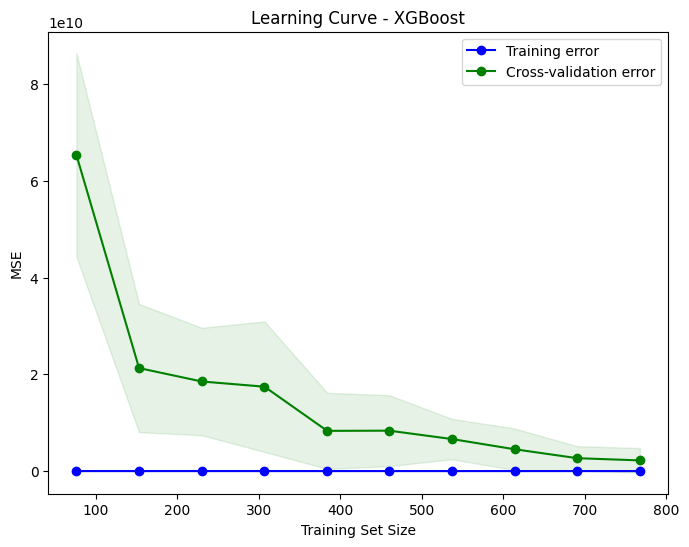

In [ ]:
#1. Importing necessary libraries
import xgboost as xgb
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# 2. Prepare the feature matrix (X) and target vector (y)
# Assuming 'price' is the column you want to predict
X = df_selected.drop('price', axis=1)  # Drop the target variable from features
y = df_selected['price']  # Target variable

# 3. Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=400,              # Number of trees (can be tuned)
    learning_rate=0.1,             # Learning rate (can be tuned)
    max_depth=6,                   # Maximum depth of trees (can be tuned)
    random_state=88
)

# 4. Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

# 5. Calculate the mean and std of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 6. Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve - XGBoost')
plt.legend(loc='best')
plt.show()

<ipython-input-68-f0deafc3a410>:36: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


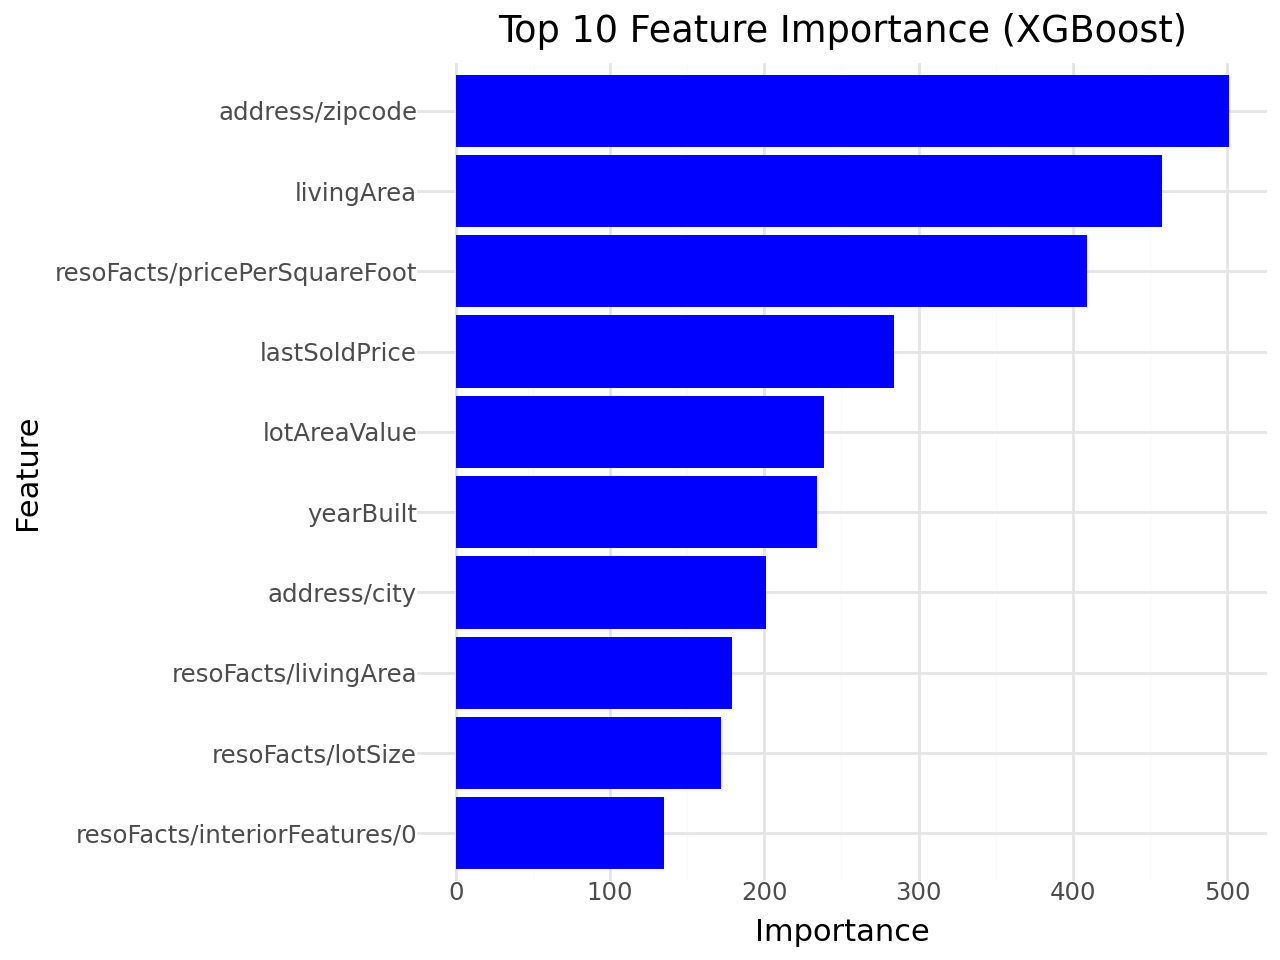

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from plotnine import ggplot, aes, geom_bar, coord_flip, labs, theme_minimal

# Sample data
# X should be your feature set and y your target variable
# X, y = ...

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Extract feature importance from the trained XGBoost model
importance_dict = xgb_model.get_booster().get_score(importance_type='weight')

# Convert the importance dict to a DataFrame
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])

# Sort by importance and select top 10 features
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Create a bar plot using plotnine (ggplot)
plot = (
    ggplot(importance_df, aes(x='reorder(Feature, Importance)', y='Importance')) +
    geom_bar(stat='identity', fill='blue') +
    coord_flip() +
    labs(title='Top 10 Feature Importance (XGBoost)', x='Feature', y='Importance') +
    theme_minimal()
)

# Display the plot
print(plot)


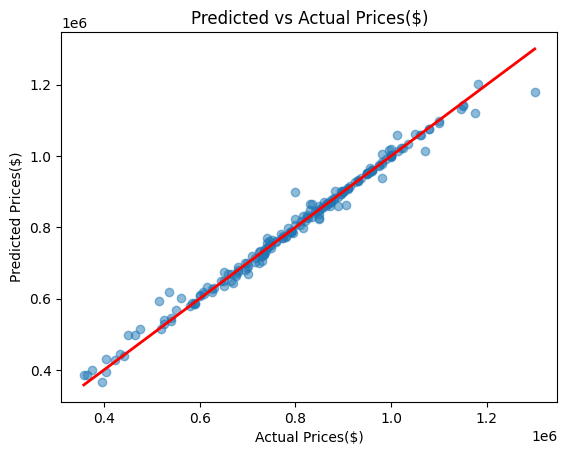

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual Prices($)')
plt.xlabel('Actual Prices($)')
plt.ylabel('Predicted Prices($)')
plt.show()

In [ ]:
# 1. Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score

# 2. Prepare the feature matrix (X) and target vector (y)
# Assuming 'price' is the column you want to predict
X = df_selected.drop('price', axis=1)  # Drop the target variable from features
y = df_selected['price']  # Target variable

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(
    n_estimators=200,  # Number of trees (can be tuned)
    max_depth=None,    # Maximum depth of trees (can be tuned or set to None to expand until leaves are pure)
    random_state=42,   # Random state for reproducibility
    n_jobs=-1          # Use all CPU cores for faster training
)

# 5. Train the model
rf_model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r_squared = r2_score(y_test, y_pred)  # Calculate R-squared

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")  # Print the R-squared value


Root Mean Squared Error (RMSE): 26933.378324202135
R-squared: 0.9775229313010029


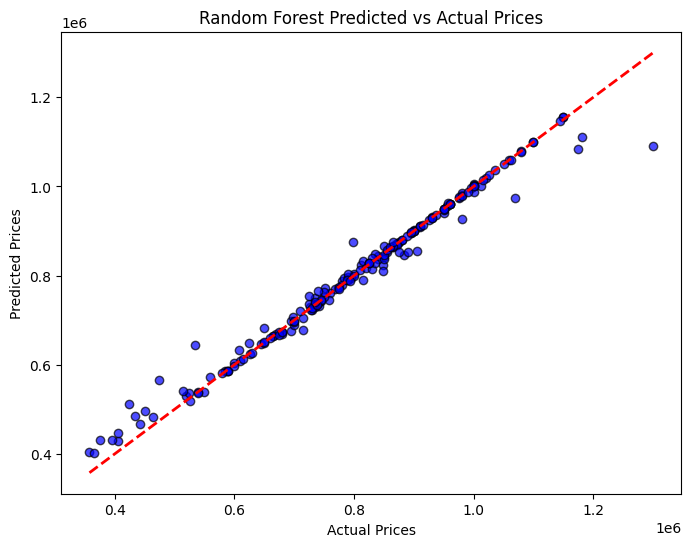

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test is your test set and y_test are the actual prices
y_pred = rf_model.predict(X_test)

# Plot predicted vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Predicted vs Actual Prices')
plt.show()

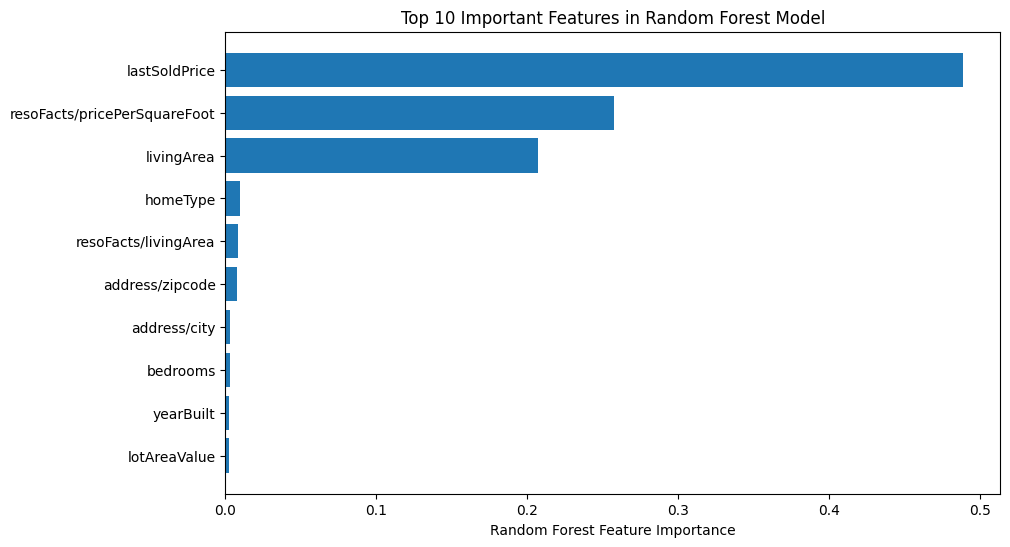

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming rf_model is your trained RandomForestRegressor model
# and X is your feature matrix with columns corresponding to feature names

# Get the feature importances from the model
feature_importances = rf_model.feature_importances_

# Sort the feature importances in descending order and get the sorted feature names
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order
sorted_features = X.columns[sorted_idx]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], feature_importances[sorted_idx][:10])  # Plot top 10 features
plt.xlabel("Random Forest Feature Importance")
plt.title("Top 10 Important Features in Random Forest Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

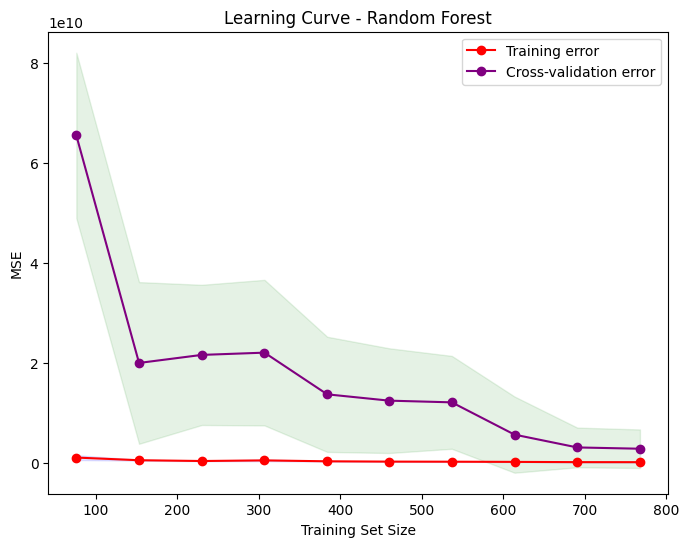

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

# Calculate the mean and std of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='red', label='Training error')
plt.plot(train_sizes, test_mean, 'o-', color='purple', label='Cross-validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve - Random Forest')
plt.legend(loc='best')
plt.show()